# Logistic Regression

Logistic regression is a classification algorithm used to assign observations to a discrete set of classes. Unlike linear regression which outputs continuous number values, logistic regression transforms its output using the logistic sigmoid function to return a probability value which can then be mapped to two or more discrete classes.

**Logistic regression can be used for:**

1. Binary Classification
2. Multi-class Classification
3. One-vs-Rest Classification

# Assumptions of Logistic regression


1. The dependent variable must be categorical in nature.
2. The independent variables(features) must be independent.
3. There should be no outliers in the data. Check for outliers.
4. There should be no high correlations among the independent variables. This can be checked using a correlation matrix.

In [2]:
## import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler

In [22]:
#load Dataset
df = sns.load_dataset('titanic')
df.head()
# df = sns.load_dataset('titanic')

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [23]:
# data info
df.info


<bound method DataFrame.info of      survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0           0       3    male  22.0      1      0   7.2500        S   Third   
1           1       1  female  38.0      1      0  71.2833        C   First   
2           1       3  female  26.0      0      0   7.9250        S   Third   
3           1       1  female  35.0      1      0  53.1000        S   First   
4           0       3    male  35.0      0      0   8.0500        S   Third   
..        ...     ...     ...   ...    ...    ...      ...      ...     ...   
886         0       2    male  27.0      0      0  13.0000        S  Second   
887         1       1  female  19.0      0      0  30.0000        S   First   
888         0       3  female   NaN      1      2  23.4500        S   Third   
889         1       1    male  26.0      0      0  30.0000        C   First   
890         0       3    male  32.0      0      0   7.7500        Q   Third   

       who  adult_m

In [24]:
#describe data
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [25]:
#check missing values
df.isnull().sum().sort_values(ascending=False)

deck           688
age            177
embarked         2
embark_town      2
survived         0
pclass           0
sex              0
sibsp            0
parch            0
fare             0
class            0
who              0
adult_male       0
alive            0
alone            0
dtype: int64

In [26]:
#preprocess the data
# remove the deck column 
df.drop('deck', axis=1, inplace=True)
#impute missing values in age and fare 
df['age'].fillna(df['age'].median(), inplace=True)

#impute missing values in embark and embark town 
df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)
df['embark_town'].fillna(df['embark_town'].mode()[0], inplace=True)

#encode the categorical variables using for loop where  objects and category datatypes
for col in df.columns:
    if df[col].dtype == 'object' or df[col].dtype.name == 'category':
        df[col] = LabelEncoder().fit_transform(df[col])
        df.head()

C:\Users\FRIEND COMPUTER\AppData\Local\Temp\ipykernel_11960\228817215.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].median(), inplace=True)
C:\Users\FRIEND COMPUTER\AppData\Local\Temp\ipykernel_11960\228817215.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves

In [27]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,1,22.0,1,0,7.2500,2,2,1,True,2,0,False
1,1,1,0,38.0,1,0,71.2833,0,0,2,False,0,1,False
2,1,3,0,26.0,0,0,7.9250,2,2,2,False,2,1,True
3,1,1,0,35.0,1,0,53.1000,2,0,2,False,2,1,False
4,0,3,1,35.0,0,0,8.0500,2,2,1,True,2,0,True


In [28]:
# x and y column 
X = df.drop('survived', axis=1)
y = df['survived']

In [33]:
# train test split data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [34]:
# call the model 
model = LogisticRegression()

In [35]:
# train the model 
model.fit(X_train, y_train)

c:\Users\FRIEND COMPUTER\miniconda3\envs\Python_ML\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [36]:
# predict the values 
y_pred = model.predict(X_test)

In [38]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,1,22.0,1,0,7.2500,2,2,1,True,2,0,False
1,1,1,0,38.0,1,0,71.2833,0,0,2,False,0,1,False
2,1,3,0,26.0,0,0,7.9250,2,2,2,False,2,1,True
3,1,1,0,35.0,1,0,53.1000,2,0,2,False,2,1,False
4,0,3,1,35.0,0,0,8.0500,2,2,1,True,2,0,True


In [47]:
model.predict([[3, 1, 22, 1, 0, 7.25, 2, 2, 1, 1, 0, 0, 0]])

c:\Users\FRIEND COMPUTER\miniconda3\envs\Python_ML\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [49]:
# check the prediction
print('prediction : ', y_pred)
print('actual: ', y_test)

prediction :  [1 0 0 1 1 1 1 0 1 1 0 0 0 0 0 1 1 1 0 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 1 0 1
 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 1 1 1 0 1 1 0 0 0 0 0 0 1 0 1 1 1
 0 0 0 1 0 0 0 1 1 0 0 0 1 1 0 0 1 0 0 0 0 0 1 1 1 0 0 0 1 0 0 0 1 0 1 1 1
 0 1 1 0 0 0 0 1 0 0 1 1 1 0 1 1 0 0 0 1 1 0 1 1 1 1 0 0 0 0 0 0 0 0 1 0 0
 1 0 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 0 1 0 0 1 1 1 0 0 0 1 1 1]
actual:  709    1
439    0
840    0
720    1
39     1
      ..
433    0
773    0
25     1
84     1
10     1
Name: survived, Length: 179, dtype: int64


In [51]:
# evlauate the model 
print('accuracy_score:', accuracy_score(y_test, y_pred))
print('recall_score:', recall_score(y_test, y_pred))
print('precision_score:', precision_score(y_test, y_pred))
print('f1_score:', f1_score(y_test, y_pred))
print('confusion Matrix: \n ', confusion_matrix(y_test, y_pred))
print('classification Report: \n', classification_report(y_test, y_pred))



accuracy_score: 1.0
recall_score: 1.0
precision_score: 1.0
f1_score: 1.0
confusion Matrix: 
  [[105   0]
 [  0  74]]
classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       105
           1       1.00      1.00      1.00        74

    accuracy                           1.00       179
   macro avg       1.00      1.00      1.00       179
weighted avg       1.00      1.00      1.00       179



Text(50.722222222222214, 0.5, 'actual')

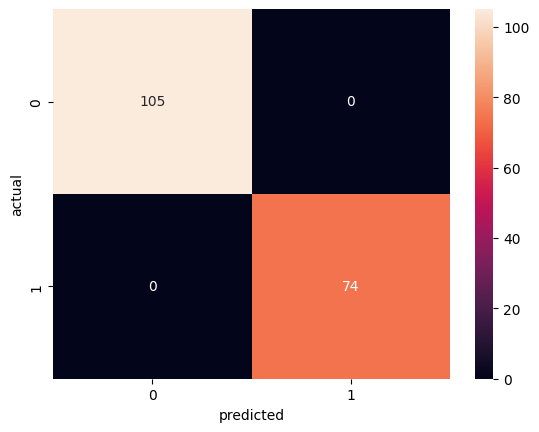

In [52]:
#plot the confusion matrix
plt.Figure(figsize=(10, 7))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.xlabel('predicted')
plt.ylabel('actual')

In [53]:
# save the model 
import pickle 
pickle.dump(model, open('./saved_model/01_model_logistic_Regression.pkl', 'wb'))

In [54]:
# run the pickle model file 
loaded_model = pickle.load(open('saved_model/01_model_logistic_regression.pkl', 'rb'))

In [55]:
print('perdiction using loaded model: ', loaded_model.predict([[3, 1, 22, 1, 0, 7.25, 2, 2, 1, 1, 0, 0, 0,]]))

perdiction using loaded model:  [0]


c:\Users\FRIEND COMPUTER\miniconda3\envs\Python_ML\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


# Why logistic regression is a type of classifcation?

Logistic regression is indeed a problem of classification. It is a type of statistical analysis that is commonly used in machine learning and data mining to predict a binary outcome. The term "logistic" in logistic regression comes from the Logit function which is used in this method.
The goal of logistic regression is to find the best fitting model to describe the relationship between the dichotomous characteristic of interest (the dependent variable) and a set of independent (predictor) variables. Logistic regression uses the concept of maximum likelihood estimation to determine the line of best fit.

In logistic regression, the dependent variable is binary, meaning it can only take two values. The logistic regression model uses a special function, the logistic function or sigmoid function, to model the probability of the dependent variable being a certain value. The output of the logistic function is a value between 0 and 1, representing the probability that the dependent variable is the value of interest.